# 変数間の相関

## ライブラリのインポート

In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# データ読み込み
# データの読み込み
train_data = pd.read_csv('train.csv')

# 不要項目を削除する
train_data_var = train_data.drop(columns=['id'])

# 欠損値を削除する
train_data_drop = train_data_var.dropna()


# 補正データの確認
print(train_data_drop.shape)
print(train_data_drop.head())


(228971, 9)
   loan_amnt     term  interest_rate grade employment_length  \
1     1200.0  5 years          16.29    C4           2 years   
2     2000.0  5 years          21.98    E4          10 years   
3     1000.0  3 years           8.59    A5           4 years   
4     1500.0  3 years          13.99    C1           4 years   
5      310.0  3 years           7.35    A4           3 years   

              purpose  credit_score application_type loan_status  
1  debt_consolidation         700.0       Individual  ChargedOff  
2    home_improvement         670.0       Individual   FullyPaid  
3  debt_consolidation         710.0       Individual   FullyPaid  
4  debt_consolidation         680.0       Individual   FullyPaid  
5      major_purchase         790.0       Individual   FullyPaid  


### 箱ひげ図

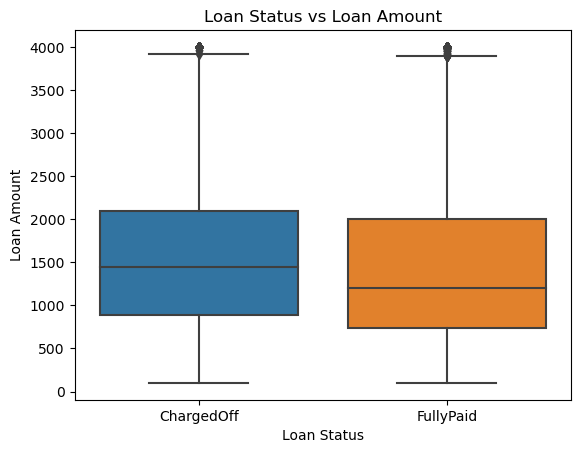

In [3]:
# loan_amntの箱ひげ図を作成
sns.boxplot(x='loan_status',y='loan_amnt',data=train_data_drop)

# タイトルを指定
plt.title('Loan Status vs Loan Amount')

# x軸ラベルを指定
plt.xlabel('Loan Status')

# y軸ラベルを指定
plt.ylabel('Loan Amount')

# 作成した箱ひげ図を表示
plt.show()

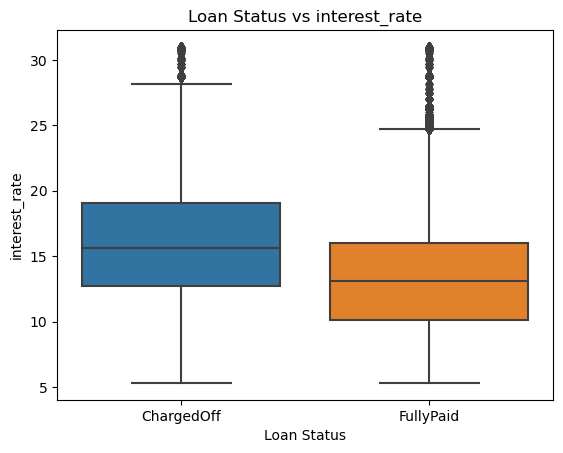

In [4]:
# interest_rateの箱ひげ図を作成
sns.boxplot(x='loan_status',y='interest_rate',data=train_data_drop)

# タイトルを指定
plt.title('Loan Status vs interest_rate')

# x軸ラベルを指定
plt.xlabel('Loan Status')

# y軸ラベルを指定
plt.ylabel('interest_rate')

# 作成した箱ひげ図を表示
plt.show()

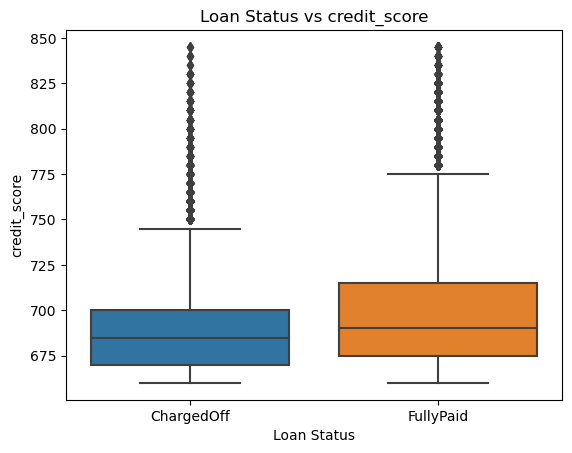

In [5]:
# credit_scoreの箱ひげ図を作成
sns.boxplot(x='loan_status',y='credit_score',data=train_data_drop)

# タイトルを指定
plt.title('Loan Status vs credit_score')

# x軸ラベルを指定
plt.xlabel('Loan Status')

# y軸ラベルを指定
plt.ylabel('credit_score')

# 作成した箱ひげ図を表示
plt.show()

### クロス集計

loan_status  ChargedOff  FullyPaid     All
term                                      
3 years           29339     148241  177580
5 years           15206      36185   51391
All               44545     184426  228971
loan_status  ChargedOff  FullyPaid     All    c_rate    f_rate
term                                                          
3 years           29339     148241  177580  0.165216  0.834784
5 years           15206      36185   51391  0.295888  0.704112
All               44545     184426  228971  0.194544  0.805456


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36820 (\N{CJK UNIFIED IDEOGRAPH-8FD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28168 (\N{CJK UNIFIED IDEOGRAPH-6E08}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

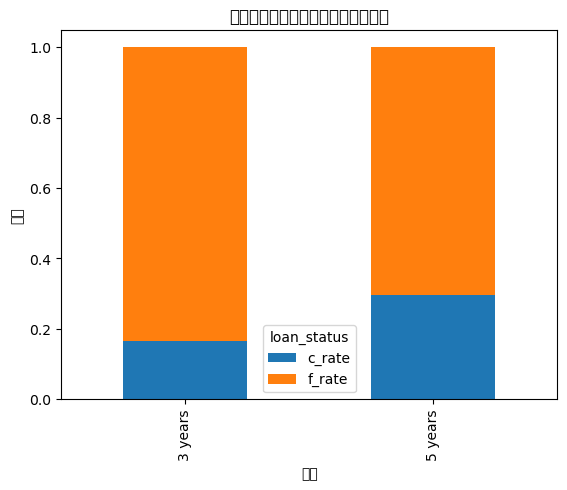

In [6]:
# termとloan_statusのクロス集計
# termカラムをインデックス（行）、loan_statusカラムをカラム（列）としてクロス集計
cross_term = pd.crosstab(train_data_drop['term'], train_data_drop['loan_status'], margins=True)

# クロス集計結果の表示
print(cross_term)

# 貸し倒れの割合を算出する
# ChargedOffカラムをAllカラムで割り、変数c_rateに代入
c_rate = cross_term['ChargedOff'] / cross_term['All']

# FullyPaidカラムをAllカラムで割り、変数f_rateに代入
f_rate = cross_term['FullyPaid'] / cross_term['All']

# 変数c_rate及び変数f_rateを変数cross_termに新たなカラムc_rate、f_rateとしてそれぞれ代入
cross_term['c_rate'] = c_rate
cross_term['f_rate'] = f_rate

# クロス集計表の表示
print(cross_term)

# All行を削除する
cross_term = cross_term.drop(index = ['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_term[['c_rate', 'f_rate']]

# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True)

# グラフタイトルの設定
plt.title('返済期間ごとの貸し倒れ率と完済率')

# x軸ラベルの設定
plt.xlabel('期間')

# y軸ラベルの設定
plt.ylabel('割合')

# グラフの表示
plt.show()


loan_status        ChargedOff  FullyPaid     All
employment_length                               
0 years                  3899      14612   18511
1 year                   3219      12664   15883
10 years                15013      64082   79095
2 years                  4318      17780   22098
3 years                  3805      14967   18772
4 years                  2933      11962   14895
5 years                  3271      13724   16995
6 years                  2461      10666   13127
7 years                  1998       8680   10678
8 years                  1900       8038    9938
9 years                  1728       7251    8979
All                     44545     184426  228971
loan_status        ChargedOff  FullyPaid     All    c_rate    f_rate
employment_length                                                   
0 years                  3899      14612   18511  0.210632  0.789368
1 year                   3219      12664   15883  0.202670  0.797330
10 years                15013      640

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21220 (\N{CJK UNIFIED IDEOGRAPH-52E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32154 (\N{CJK UNIFIED IDEOGRAPH-7D9A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

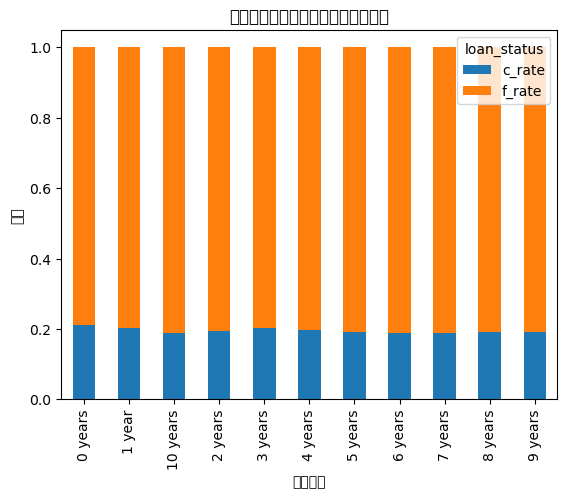

In [10]:
# employment_lengthとloan_statusの相関
# 変数loansのemployment_lengthカラムとloan_statusカラムについてクロス集計を行い、変数cross_elに代入
cross_el = pd.crosstab(train_data_drop['employment_length'],train_data_drop['loan_status'],margins=True)

# クロス集計表を表示
print(cross_el)

# 貸し倒れの割合を算出する
# ChargedOffカラムをAllカラムで割り、変数c_rateに代入
c_rate = cross_el['ChargedOff'] / cross_el['All']

# FullyPaidカラムをAllカラムで割り、変数f_rateに代入
f_rate = cross_el['FullyPaid'] / cross_el['All']

# 変数c_rate及び変数f_rateを変数cross_termに新たなカラムc_rate、f_rateとしてそれぞれ代入
cross_el['c_rate'] = c_rate
cross_el['f_rate'] = f_rate

# クロス集計表の表示
print(cross_el)

# All行を削除する
cross_el = cross_el.drop(index = ['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_el[['c_rate', 'f_rate']]

# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True)

# グラフタイトルの設定
plt.title('勤続年数ごとの貸し倒れ率と完済率')

# x軸ラベルの設定
plt.xlabel('勤続年数')

# y軸ラベルの設定
plt.ylabel('割合')

# グラフの表示
plt.show()


loan_status  ChargedOff  FullyPaid     All
grade                                     
A1                  194       5316    5510
A2                  244       5128    5372
A3                  337       5486    5823
A4                  539       6916    7455
A5                  744       8054    8798
B1                 1320      11180   12500
B2                 1483      12244   13727
B3                 1966      14094   16060
B4                 2319      13709   16028
B5                 2677      12327   15004
C1                 3009      12655   15664
C2                 2725      10887   13612
C3                 2710       9679   12389
C4                 3088       9893   12981
C5                 2984       8957   11941
D1                 2261       6284    8545
D2                 2384       6019    8403
D3                 1961       4741    6702
D4                 1904       4356    6260
D5                 1650       3668    5318
E1                 1157       2177    3334
E2         

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36024 (\N{CJK UNIFIED IDEOGRAPH-8CB8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anacond

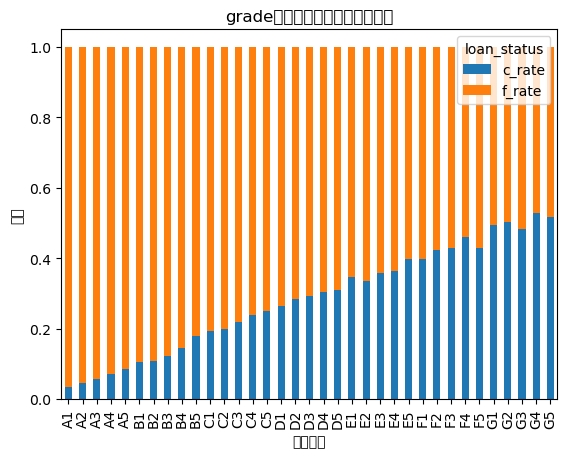

In [12]:
# gradeとloan_statusの相関
# 変数loansのemployment_lengthカラムとloan_statusカラムについてクロス集計を行い、変数cross_elに代入
cross_grade = pd.crosstab(train_data_drop['grade'],train_data_drop['loan_status'],margins=True)

# クロス集計表を表示
print(cross_grade)

# 貸し倒れの割合を算出する
# ChargedOffカラムをAllカラムで割り、変数c_rateに代入
c_rate = cross_grade['ChargedOff'] / cross_grade['All']

# FullyPaidカラムをAllカラムで割り、変数f_rateに代入
f_rate = cross_grade['FullyPaid'] / cross_grade['All']

# 変数c_rate及び変数f_rateを変数cross_termに新たなカラムc_rate、f_rateとしてそれぞれ代入
cross_grade['c_rate'] = c_rate
cross_grade['f_rate'] = f_rate

# クロス集計表の表示
print(cross_grade)

# All行を削除する
cross_grade = cross_grade.drop(index = ['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_grade[['c_rate', 'f_rate']]

# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True)

# グラフタイトルの設定
plt.title('gradeごとの貸し倒れ率と完済率')

# x軸ラベルの設定
plt.xlabel('勤続年数')

# y軸ラベルの設定
plt.ylabel('割合')

# グラフの表示
plt.show()


loan_status         ChargedOff  FullyPaid     All
purpose                                          
car                        387       2338    2725
credit_card               7469      38214   45683
debt_consolidation       27339     106541  133880
home_improvement          2604      12439   15043
house                      333       1290    1623
major_purchase            1003       4423    5426
medical                    531       2046    2577
moving                     358       1325    1683
other                     3077      11250   14327
renewable_energy            48        149     197
small_business             974       2244    3218
vacation                   296       1282    1578
wedding                    126        885    1011
All                      44545     184426  228971
loan_status         ChargedOff  FullyPaid     All    c_rate    f_rate
purpose                                                              
car                        387       2338    2725  0.142018 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36024 (\N{CJK UNIFIED IDEOGRAPH-8CB8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anacond

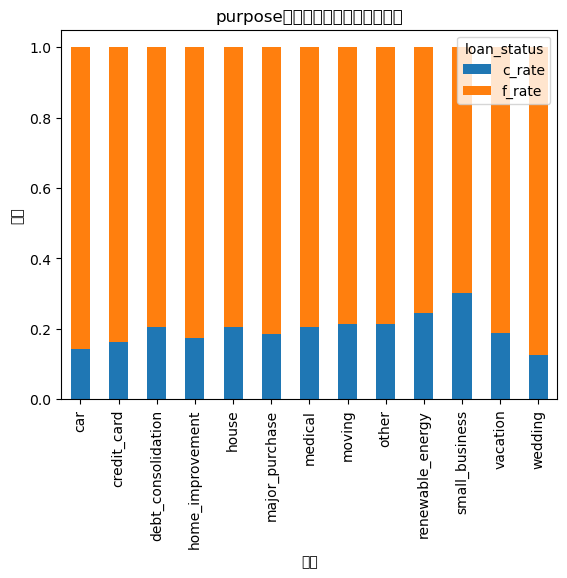

In [8]:
# purposeとloan_statusの相関
# 変数loansのemployment_lengthカラムとloan_statusカラムについてクロス集計を行い、変数cross_elに代入
cross_purpose = pd.crosstab(train_data_drop['purpose'],train_data_drop['loan_status'],margins=True)

# クロス集計表を表示
print(cross_purpose)

# 貸し倒れの割合を算出する
# ChargedOffカラムをAllカラムで割り、変数c_rateに代入
c_rate = cross_purpose['ChargedOff'] / cross_purpose['All']

# FullyPaidカラムをAllカラムで割り、変数f_rateに代入
f_rate = cross_purpose['FullyPaid'] / cross_purpose['All']

# 変数c_rate及び変数f_rateを変数cross_termに新たなカラムc_rate、f_rateとしてそれぞれ代入
cross_purpose['c_rate'] = c_rate
cross_purpose['f_rate'] = f_rate

# クロス集計表の表示
print(cross_purpose)

# All行を削除する
cross_purpose = cross_purpose.drop(index = ['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_purpose[['c_rate', 'f_rate']]

# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True)

# グラフタイトルの設定
plt.title('purposeごとの貸し倒れ率と完済率')

# x軸ラベルの設定
plt.xlabel('目的')

# y軸ラベルの設定
plt.ylabel('割合')

# グラフの表示
plt.show()


loan_status       ChargedOff  FullyPaid     All
application_type                               
Individual             43223     180567  223790
Joint App               1322       3859    5181
All                    44545     184426  228971
loan_status       ChargedOff  FullyPaid     All    c_rate    f_rate
application_type                                                   
Individual             43223     180567  223790  0.193141  0.806859
Joint App               1322       3859    5181  0.255163  0.744837
All                    44545     184426  228971  0.194544  0.805456


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36024 (\N{CJK UNIFIED IDEOGRAPH-8CB8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anacond

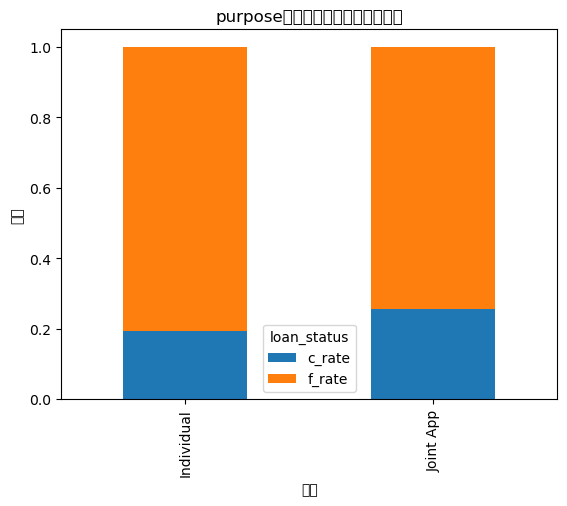

In [9]:
# papplication_typeとloan_statusの相関
# 変数loansのemployment_lengthカラムとloan_statusカラムについてクロス集計を行い、変数cross_elに代入
cross_at = pd.crosstab(train_data_drop['application_type'],train_data_drop['loan_status'],margins=True)

# クロス集計表を表示
print(cross_at)

# 貸し倒れの割合を算出する
# ChargedOffカラムをAllカラムで割り、変数c_rateに代入
c_rate = cross_at['ChargedOff'] / cross_at['All']

# FullyPaidカラムをAllカラムで割り、変数f_rateに代入
f_rate = cross_at['FullyPaid'] / cross_at['All']

# 変数c_rate及び変数f_rateを変数cross_termに新たなカラムc_rate、f_rateとしてそれぞれ代入
cross_at['c_rate'] = c_rate
cross_at['f_rate'] = f_rate

# クロス集計表の表示
print(cross_at)

# All行を削除する
cross_at = cross_at.drop(index = ['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_at[['c_rate', 'f_rate']]

# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True)

# グラフタイトルの設定
plt.title('purposeごとの貸し倒れ率と完済率')

# x軸ラベルの設定
plt.xlabel('目的')

# y軸ラベルの設定
plt.ylabel('割合')

# グラフの表示
plt.show()
